In [12]:
import pandas as pd

data_directory = '../data/'

df = pd.read_csv(data_directory + 'fraud_train.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,619,CASH_IN,386385.08,C421351828,4669568.85,5055953.92,C1977099364,506035.06,119649.98,0,0
1,164,CASH_IN,212458.78,C83569848,234635.00,447093.78,C1690589535,806037.88,593579.10,0,0
2,382,PAYMENT,19967.60,C852995095,3634.00,0.00,M1695416333,0.00,0.00,0,0
3,180,CASH_OUT,527616.51,C61761046,180216.00,0.00,C577654587,92157.10,619773.61,0,0
4,36,TRANSFER,206067.85,C758004147,0.00,0.00,C2143015292,2131494.48,2337562.32,0,0


### Check for missing values:

In [13]:
import numpy as np
# check for missing values

np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

no missing values in the data, so no row removal or column estimation required right now

### Encode Categorical variables

type, name of origin and destination features are categorical. Need to encode them with numerical values to make them comprehensible to the algorithms i will be coding.

Methods:
1) Ordinal coding - for known relationship between categories - not our case
2) One hot encoding - no relationship between categories - reflects our case
3) Learned embedding - combines both

Since there is no ordered relationship between the categories, using one hot encoding makes.

Downside: too many columns are generated

In [14]:
print(df['type'].nunique())
print(df['type'].unique())

print(df['nameOrig'].nunique())

print(df['nameDest'].nunique())

# number of rows in the frame
print(df.shape[0])

5
['CASH_IN' 'PAYMENT' 'CASH_OUT' 'TRANSFER' 'DEBIT']
5084151
2265727
5090096


it seems feasible to use one hot encoding for type of transaction, but not for name and destination categories

What about the number of categories per class and how many categorical variables do each have?

In [15]:
# rows with isfraud = 1
print(df[df['isFraud'] == 1].shape[0])

print(df[df['isFraud'] == 0].shape[0])

print(df[df['isFlaggedFraud'] == 1].shape[0])

print(df[df['isFlaggedFraud'] == 0].shape[0])

# print unique type for isfraud == 1 (total = 5)
print(df[df['isFraud'] == 1]['type'].unique())

print(df[df['isFlaggedFraud'] == 1]['type'].unique())

print(df[df['isFraud'] == 1]['nameDest'].nunique())

6593
5083503
13
5090083
['TRANSFER' 'CASH_OUT']
['TRANSFER']
6566


Is the transaction amount matching the difference in the account balance?

In [107]:
# check for rows in which the amount feature is not the same as the difference in the balance of the origin and destination accounts

print(df[(df['amount'] != df['newbalanceOrig'] - df['oldbalanceOrg'])].shape[0])
print(df[(df['amount'] != df['oldbalanceDest'] - df['newbalanceDest'])].shape[0])

print(df[(abs(df['newbalanceOrig'] - df['oldbalanceOrg']) != abs(df['oldbalanceDest'] - df['newbalanceDest']))].shape[0])
print(df[(df['newbalanceOrig'] - df['oldbalanceOrg'] != df['oldbalanceDest'] - df['newbalanceDest']) | (df['amount'] != df['newbalanceOrig'] - df['oldbalanceOrg']) | (df['amount'] != df['oldbalanceDest'] - df['newbalanceDest'])].shape[0])

4698841
4937746
4276838
5036250


Ammount of transaction in fraud transactions

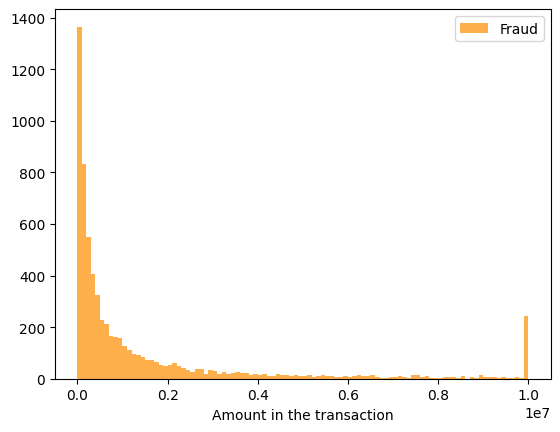

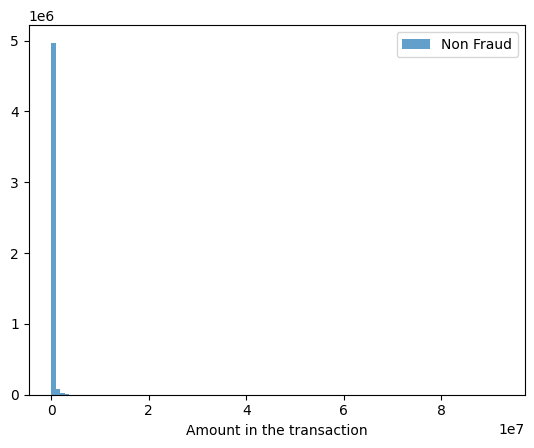

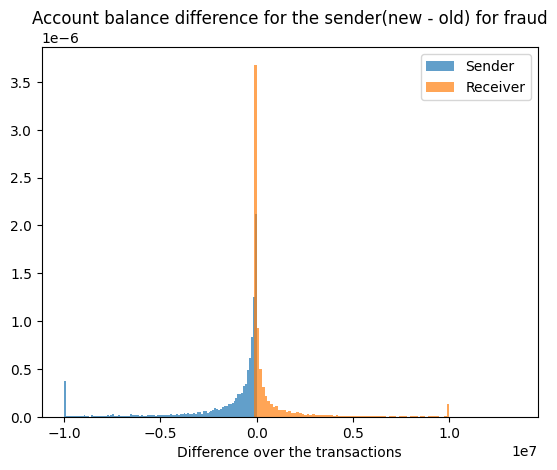

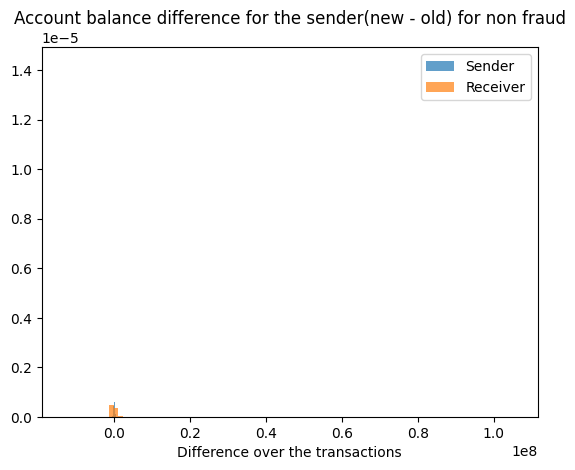

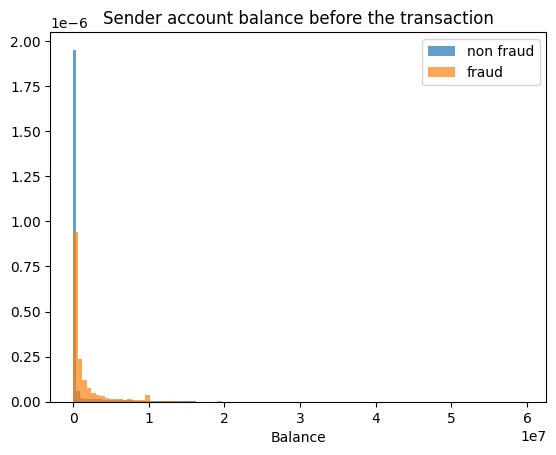

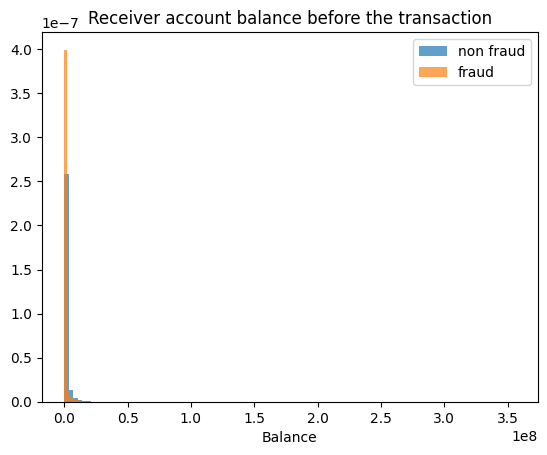

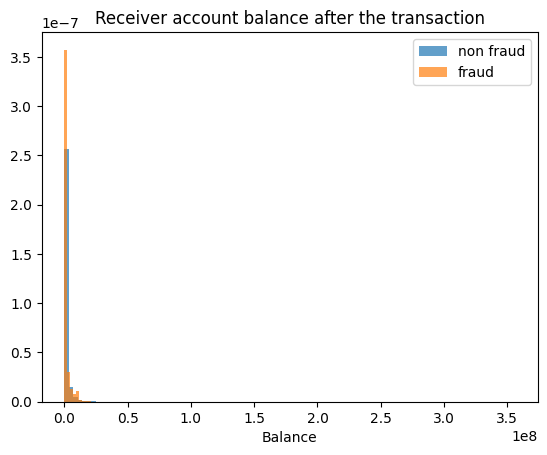

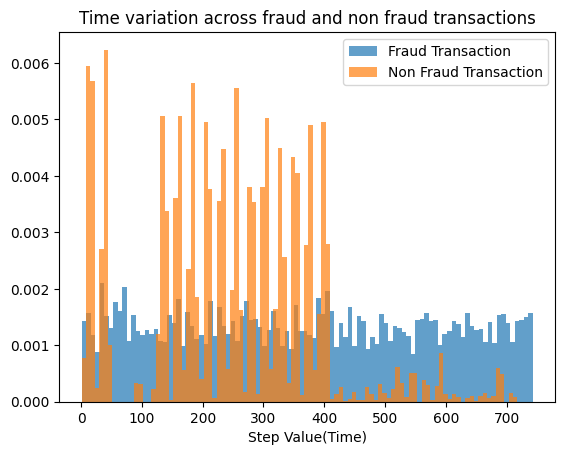

In [65]:
# plot for amount index for isFraud == 1

import matplotlib.pyplot as plt

plt.hist(df[df['isFraud'] == 1]['amount'],bins=100, color='darkorange', label='Fraud',alpha=0.7)
plt.xlabel('Amount in the transaction')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 0]['amount'],bins=100, label='Non Fraud',alpha=0.7)
plt.xlabel('Amount in the transaction')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 1]['newbalanceOrig'] - df[df['isFraud'] == 1]['oldbalanceOrg'],bins=100,label='Sender',alpha=0.7,density=True)
plt.hist(df[df['isFraud'] == 1]['newbalanceDest'] - df[df['isFraud'] == 1]['oldbalanceDest'],bins=100,label='Receiver',alpha=0.7,density=True)
plt.xlabel('Difference over the transactions')
plt.title('Account balance difference for the sender(new - old) for fraud')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 0]['newbalanceOrig'] - df[df['isFraud'] == 0]['oldbalanceOrg'],bins=100,label='Sender',alpha=0.7,density=True)
plt.hist(df[df['isFraud'] == 0]['newbalanceDest'] - df[df['isFraud'] == 0]['oldbalanceDest'],bins=100,label='Receiver',alpha=0.7,density=True)
plt.xlabel('Difference over the transactions')
plt.title('Account balance difference for the sender(new - old) for non fraud')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 0]['oldbalanceOrg'],bins=100,label='non fraud',alpha=0.7, density=True)
plt.hist(df[df['isFraud'] == 1]['oldbalanceOrg'],bins=100,label='fraud',alpha=0.7, density=True)
plt.xlabel('Balance')
plt.title('Sender account balance before the transaction')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 0]['oldbalanceDest'],bins=100,label='non fraud',alpha=0.7, density=True)
plt.hist(df[df['isFraud'] == 1]['oldbalanceDest'],bins=100,label='fraud',alpha=0.7, density=True)
plt.xlabel('Balance')
plt.title('Receiver account balance before the transaction')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 0]['newbalanceDest'],bins=100,label='non fraud',alpha=0.7, density=True)
plt.hist(df[df['isFraud'] == 1]['newbalanceDest'],bins=100,label='fraud',alpha=0.7, density=True)
plt.xlabel('Balance')
plt.title('Receiver account balance after the transaction')
plt.legend()
plt.show()

plt.hist(df[df['isFraud'] == 1]['step'],bins=100,label='Fraud Transaction',alpha=0.7, density=True)
plt.hist(df[df['isFraud'] == 0]['step'],bins=100,label='Non Fraud Transaction',alpha=0.7, density=True)
plt.xlabel('Step Value(Time)')
plt.title('Time variation across fraud and non fraud transactions')
plt.legend()
plt.show()


One hot encoding for 'type' categories

In [ ]:
# first implementing DT with categorical type values



Do PCA and understand feature correlation

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_53928/980797388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['diffOrig'] = numeric_df['newbalanceOrig'] - numeric_df['oldbalanceOrg']
/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_53928/980797388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['diffDest'] = numeric_df['newbalanceDest'] - numeric_df['oldbalanceDest']


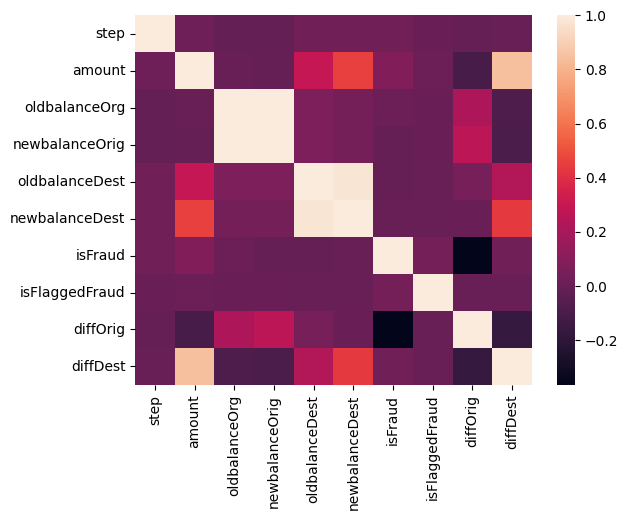

In [10]:
# Plot correlation matrix:
import seaborn as sns

numeric_df = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
# add account balance difference

numeric_df['diffOrig'] = numeric_df['newbalanceOrig'] - numeric_df['oldbalanceOrg']
numeric_df['diffDest'] = numeric_df['newbalanceDest'] - numeric_df['oldbalanceDest']

corr = numeric_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Decision Tree implementation

In [74]:
import numpy as np
import pandas as pd

class Node:
    def __init__(self, datapoints):
        self.datapoints = datapoints
        self.feature_index = None
        self.threshold = None
        self.right = None
        self.left = None
        self.is_leafnode = False
        self.depth = 0
        self.prediction = None

class DecisionTree:
    def __init__(self, max_depth, min_size, datapoints):
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = Node(datapoints)

    def get_entropy(self, node):
        X = node.datapoints
        # for binary classification
        class_0 = X[X.iloc[:,-1] == 0]
        class_1 = X[X.iloc[:,-1] == 1]
        if len(class_0) == 0 or len(class_1) == 0:
            return 0
        p_0 = len(class_0) / len(X)
        p_1 = len(class_1) / len(X)
        entropy = -1 * (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
        return entropy
    
    def split_data(self, node, feature_index, threshold):
        X = node.datapoints
        left_split = X[X.iloc[:, feature_index] <= threshold]
        right_split = X[X.iloc[:, feature_index] > threshold]
        return left_split, right_split
    
    def find_best_split(self, node):
        X = node.datapoints
        entropy_parent = self.get_entropy(node)
        
        best_information_gain = -float('inf')
        best_feature_index = None
        best_feature_val = None

        # exclude the label from X
        for feature_index in range(X.shape[1] - 1):
            feature_values = X.iloc[:, feature_index].unique()
            for feature_val in feature_values:
                left_split, right_split = self.split_data(node, feature_index, feature_val)
                
                if len(left_split) == 0 or len(right_split) == 0:
                    continue
                
                left_entropy = self.get_entropy(Node(left_split))
                right_entropy = self.get_entropy(Node(right_split))
                
                # get the information gain
                information_gain = entropy_parent - (len(left_split) / len(X) * left_entropy + len(right_split) / len(X) * right_entropy)
                
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_feature_index = feature_index
                    best_feature_val = feature_val

        return best_feature_index, best_feature_val, best_information_gain

    def build_tree(self, node, depth):
        print(f"current node at depth: {depth}, datapoints left: {len(node.datapoints)}, unique classes: {set(node.datapoints.iloc[:,-1])}")
        if len(node.datapoints) < self.min_size:
            node.is_leafnode = True
            node.prediction = self.pred_node(node)
            print(f"leaf node created at depth {depth} because of the min points conditions, class={node.prediction}")
            print("entropy:",self.get_entropy(node))
            return node
        
        if depth >= self.max_depth:
            node.is_leafnode = True
            node.prediction = self.pred_node(node)
            print(f"leaf node created at depth {depth} because of the max depth condition, class={node.prediction}")
            print("entropy:",self.get_entropy(node))
            return node
        
        # impurity of the current node is 0
        if self.get_entropy(node) == 0:
            node.is_leafnode = True
            node.prediction = self.pred_node(node)
            print(f"leaf node created at depth {depth} as the node has 0 impurity, class={node.prediction}")
            return node
        
        best_feature_index, best_feature_val, information_gain = self.find_best_split(node)
        
        if information_gain <= 0:
            node.is_leafnode = True
            node.prediction = self.pred_node(node)
            print(f"leaf node created at depth {depth} as there is no information gain, class={node.prediction}")
            return node
        
        left_split, right_split = self.split_data(node, best_feature_index, best_feature_val)
        
        if len(left_split) == 0 or len(right_split) == 0:
            node.is_leafnode = True
            node.prediction = self.pred_node(node)
            print(f"leaf node created at depth {depth} as the split does not create two children, class={node.prediction}")
            return node
        
        node.feature_index = best_feature_index
        node.threshold = best_feature_val
        print(f"node created at depth {depth} with feature={features[best_feature_index]}, threshold={best_feature_val} and entropy={self.get_entropy(node)}")
        
        node.left = self.build_tree(Node(left_split), depth + 1)
        node.right = self.build_tree(Node(right_split), depth + 1)
        return node
    
    def fit(self, X):
        print("fitting the decision tree...")
        self.root = self.build_tree(self.root, 0)
        print("fitting complete")

    def pred_node(self, node):
        pred_dict = {1: 0, 0: 0}
        for index, datapoint in node.datapoints.iterrows():
            pred_dict[datapoint.iloc[-1]] += 1
        return max(pred_dict, key=pred_dict.get)

    def predictdatapoint(self,datapoint):
        node_cur = self.root
        while not node_cur.is_leafnode:
            if datapoint[node_cur.feature_index] <= node_cur.threshold:
                node_cur = node_cur.left
            else:
                node_cur = node_cur.right
        return node_cur.prediction
    
    def predict(self, X):
        return X.apply(self.predictdatapoint, axis=1).tolist()

    def write_metrics(preds, y_true):
        preds = np.array(preds)
        y_true = np.array(y_true)

        accuracy = np.sum(preds == y_true) / len(y_true)
        
        tp = np.sum((preds == 1) & (y_true == 1))
        fp = np.sum((preds == 1) & (y_true == 0))
        fn = np.sum((preds == 0) & (y_true == 1))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        tn = np.sum((preds == 0) & (y_true == 0))
        
        confusion_matrix = [[int(tn), int(fp)], [int(fn), int(tp)]]

        with open('../results/metrics.txt', 'w') as f:
            f.write("Classification Metrics:\n")
            f.write(f"Accuracy: {accuracy}\n")
            f.write(f"Precision: {precision}\n")
            f.write(f"Recall: {recall}\n")
            f.write(f"F1 Score: {f1}\n")
            f.write(f"Confusion Matrix:\n{confusion_matrix[0]}\n{confusion_matrix[1]}\n")
        print("metrics written to file")
        

# Data preparation
data_directory = '../data/'
df = pd.read_csv(data_directory + 'fraud_train.csv')

df = df.sample(frac=1).reset_index(drop=True)

# drop the last column
df = df.drop(df.columns[-1], axis=1)

df = df.dropna()

X = df[['amount', 'oldbalanceOrg']].copy()
X['diffOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
X['diffDest'] = df['newbalanceDest'] - df['oldbalanceDest']
features = X.columns
X['isFraud'] = df['isFraud']

X_train = X[:int(0.8*len(X))]
X_validation = X[int(0.8*len(X)):]

# randomly downsample the majority class to make it have the same size as the minority class
X_train_majority = X_train[X_train['isFraud'] == 0]
X_train_minority = X_train[X_train['isFraud'] == 1]

X_train_majority_downsampled = X_train_majority.sample(n=X_train_minority.shape[0])

X_train = pd.concat([X_train_majority_downsampled, X_train_minority])

# downsample the validation set as well


print("training datapoints:",X_train.shape[0])
print("fraud datapoints:",X_train[X_train['isFraud'] == 1].shape[0])
print("non fraud datapoints:",X_train[X_train['isFraud'] == 0].shape[0])

print("validation datapoints:",X_validation.shape[0])
print("fraud datapoints:",X_validation[X_validation['isFraud'] == 1].shape[0])
print("non fraud datapoints:",X_validation[X_validation['isFraud'] == 0].shape[0])

dt = DecisionTree(max_depth=10, min_size=50, datapoints=X_train)
dt.fit(dt.root.datapoints)

training datapoints: 10436
fraud datapoints: 5218
non fraud datapoints: 5218
validation datapoints: 1018020
fraud datapoints: 1375
non fraud datapoints: 1016645
fitting the decision tree...
current node at depth: 0, datapoints left: 10436, unique classes: {0, 1}


KeyboardInterrupt: 

In [73]:
# shuffle the validation dataset
print("validation datapoints:",X_validation.shape[0])
print("fraud datapoints:",X_validation[X_validation['isFraud'] == 1].shape[0])
print("non fraud datapoints:",X_validation[X_validation['isFraud'] == 0].shape[0])

predictions = dt.predict(X_validation)

validation datapoints: 1018020
fraud datapoints: 1322
non fraud datapoints: 1016698


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_28251/2524639372.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if datapoint[node_cur.feature_index] <= node_cur.threshold:


KeyboardInterrupt: 

In [44]:
dt.write_metrics(predictions, X_validation['isFraud'])

14252


In [55]:
true_positives = np.sum((predictions == 1) & (X_validation.iloc[:, -1] == 1))

# Calculate the number of actual positives (where actual is 1)
actual_positives = np.sum(X_validation.iloc[:, -1] == 1)

# Compute recall
recall = true_positives / actual_positives if actual_positives > 0 else 0

print(recall)

0.0


In [59]:
print([(predictions[i], X_validation.iloc[i,-1]) for i in range(len(predictions)) if X_validation.iloc[i,-1] == 1])

[(1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1)), (1, np.int64(1))]


In [4]:
print(X.iloc[:,-1].unique())
print(set(predictions))

[0 1]
{0, 1}


In [5]:
print(predictions.count(1))
print(predictions.count(0))
print(X_validation.value_counts())

matches = [True for i in range(len(predictions)) if predictions[i] == X.iloc[10001 + i,-1]]

10
9989
isFraud
0    9994
1       5
Name: count, dtype: int64


In [6]:
print(matches.count(True))

9990


In [37]:
# save the model
import pickle
with open('../models/decision_tree_model2.pkl', 'wb') as f:
        pickle.dump(dt, f)

# model 1 - max_depth = 20, min_size = 100
# model 2 - max_depth = 15, min_size = 50

In [8]:
print(9990/9999)

0.9990999099909991
